# **Sales Prediction Using ML Regression Models**

- This study dives into a detailed analysis of sticker sales data, leveraging machine learning regression techniques to forecast performance effectively. Inspired by the [Kaggle Playground Series - Season 5, Episode 1](https://www.kaggle.com/competitions/playground-series-s5e1/overview), this project aims to evaluate various models and extract meaningful insights from the dataset.

- While **R² Score** will provide a measure of how well the models explain the variability in sales data, our primary focus lies on **Mean Absolute Percentage Error (MAPE)**. 

### **Highlights of the Workflow**
1. **Feature Engineering**:
    - Incorporation of custom features such as splitting the date column into `year`, `month`, and `day` for temporal analysis.
    - Encoding categorical variables like `country`, `store`, and `product` to allow models to understand their impact on sales.

2. **Data Preprocessing with KNN Imputation**:
    - Missing values in the target variable (`num_sold`) will be carefully handled using the **K-Nearest Neighbors (KNN) imputer**, ensuring no valuable data is lost.

3. **Exploration of Machine Learning Models**:
    - A range of regression models will be employed, including:
        - **Linear Regression**
        - **Random Forest Regressor**
        - **XGBoost Regressor**
        - **Gradient Boosting Regressor**
    - Each model will be evaluated based on both **R² Score** and **MAPE**, with MAPE serving as the decisive performance metric.

4. **Insightful Visualizations**:
    - Elegant and insightful graphs will be crafted to:
        - Showcase model performance metrics.
        - Analyze feature importance for interpretability.
        - Visualize actual vs. predicted sales for the top-performing model.

# Importing the necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing the data

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s5e1/train.csv')

# EDA - Exploratory Data Analysis

In [3]:
df.head()

,id,date,country,store,product,num_sold
0,0,2010-01-01,Canada,Discount Stickers,Holographic Goose,NaN
1,1,2010-01-01,Canada,Discount Stickers,Kaggle,973.0
2,2,2010-01-01,Canada,Discount Stickers,Kaggle Tiers,906.0
3,3,2010-01-01,Canada,Discount Stickers,Kerneler,423.0
4,4,2010-01-01,Canada,Discount Stickers,Kerneler Dark Mode,491.0


In [4]:
df.shape

(230130, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230130 entries, 0 to 230129
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   id        230130 non-null  int64  
 1   date      230130 non-null  object 
 2   country   230130 non-null  object 
 3   store     230130 non-null  object 
 4   product   230130 non-null  object 
 5   num_sold  221259 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 10.5+ MB


In [6]:
df.isnull().sum()

id             0
date           0
country        0
store          0
product        0
num_sold    8871
dtype: int64

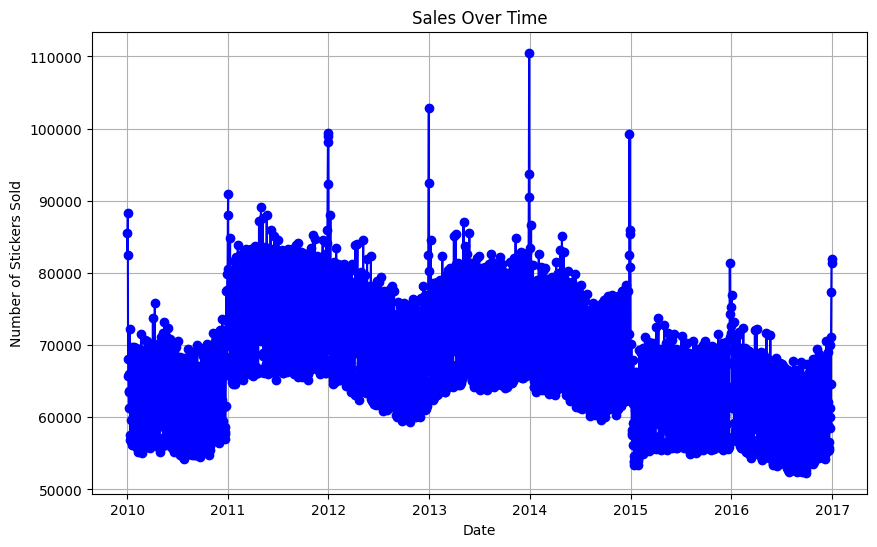

In [7]:
#sales over time
df['date'] = pd.to_datetime(df['date'])

time_series = df.groupby('date')['num_sold'].sum()
plt.figure(figsize=(10, 6))
plt.plot(time_series.index, time_series.values, marker='o', linestyle='-', color='blue')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stickers Sold')
plt.grid(True)
plt.show()

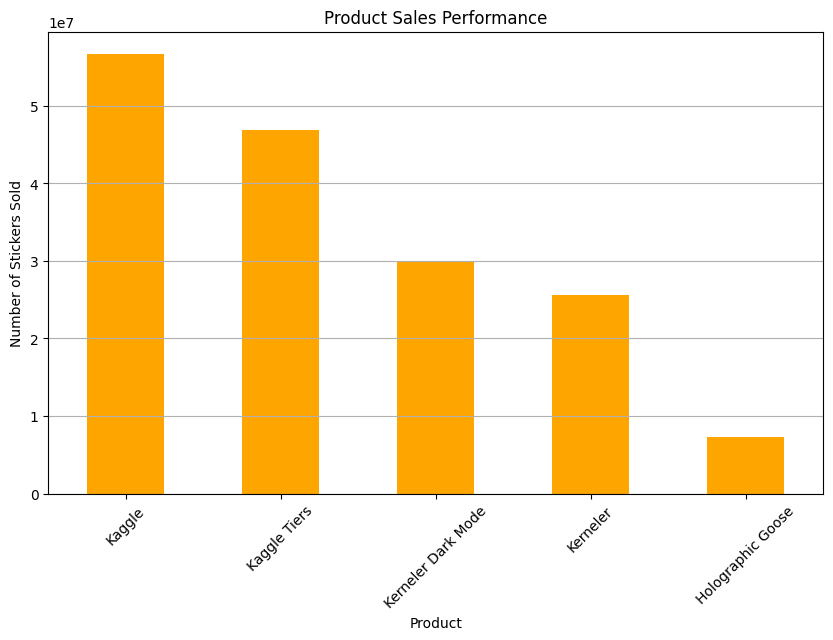

In [8]:
#sales by product
product_sales = df.groupby('product')['num_sold'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', color='orange')
plt.title('Product Sales Performance')
plt.xlabel('Product')
plt.ylabel('Number of Stickers Sold')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

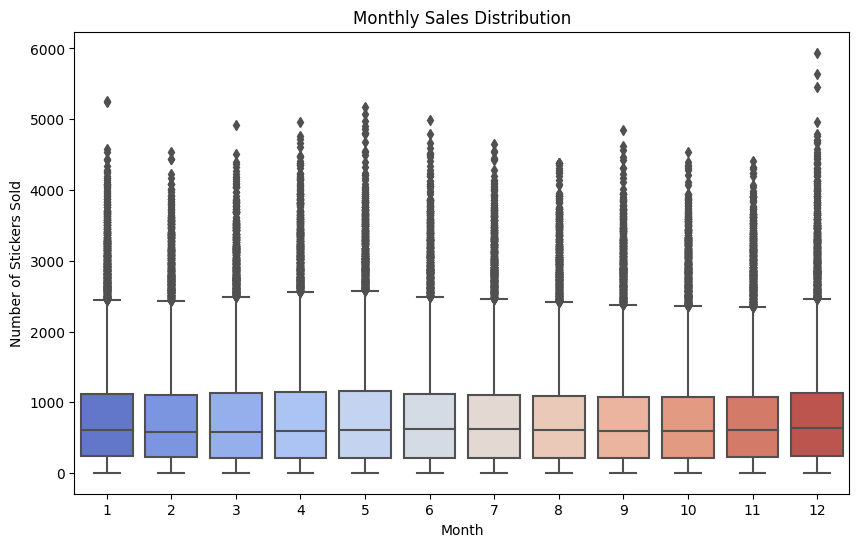

In [9]:
#monthly sales distribution
df['month'] = df['date'].dt.month
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='num_sold', data=df, palette='coolwarm')
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Number of Stickers Sold')
plt.show()

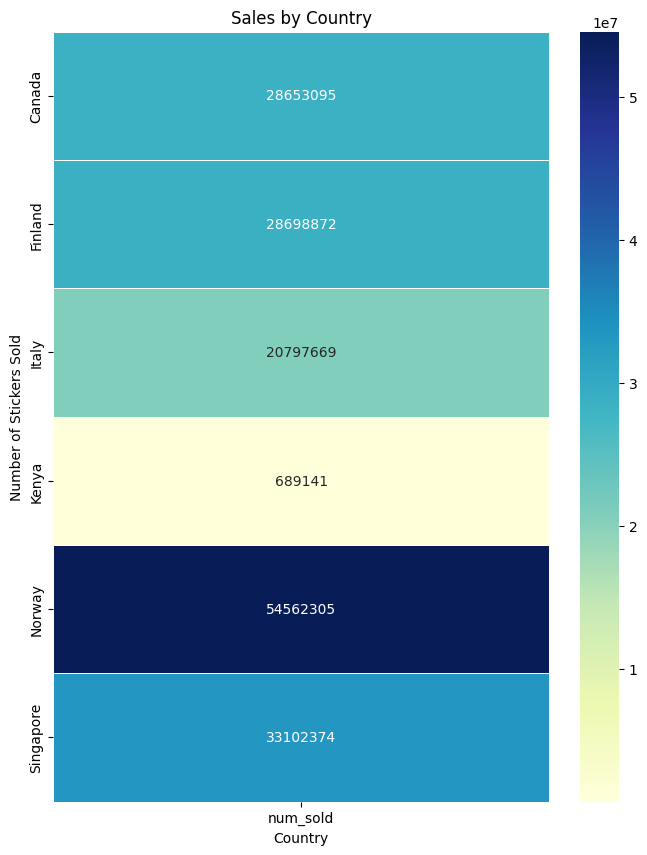

In [10]:
#total sales by country
country_sales = df.groupby('country')['num_sold'].sum().reset_index()
pivot_table = country_sales.pivot_table(index='country', values='num_sold')
plt.figure(figsize=(8, 10))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap='YlGnBu', linewidths=0.5)
plt.title('Sales by Country')
plt.xlabel('Country')
plt.ylabel('Number of Stickers Sold')
plt.show()

# Feature Engineering

In [13]:
#converting 'date' to datetime and split into 'year', 'month', and 'day'
df[['year', 'month', 'day']] = df['date'].apply(lambda x: pd.Series([x.year, x.month, x.day]))

#dropping the date column
df.drop(columns='date', inplace=True)

In [14]:
#filling the missing values in the num_sold column using KNN imputer.
features = ['num_sold', 'year', 'month', 'day']
knn_data = df[features]

knn_imputer = KNNImputer(n_neighbors=5)
imputed_data = knn_imputer.fit_transform(knn_data)
df[features] = imputed_data

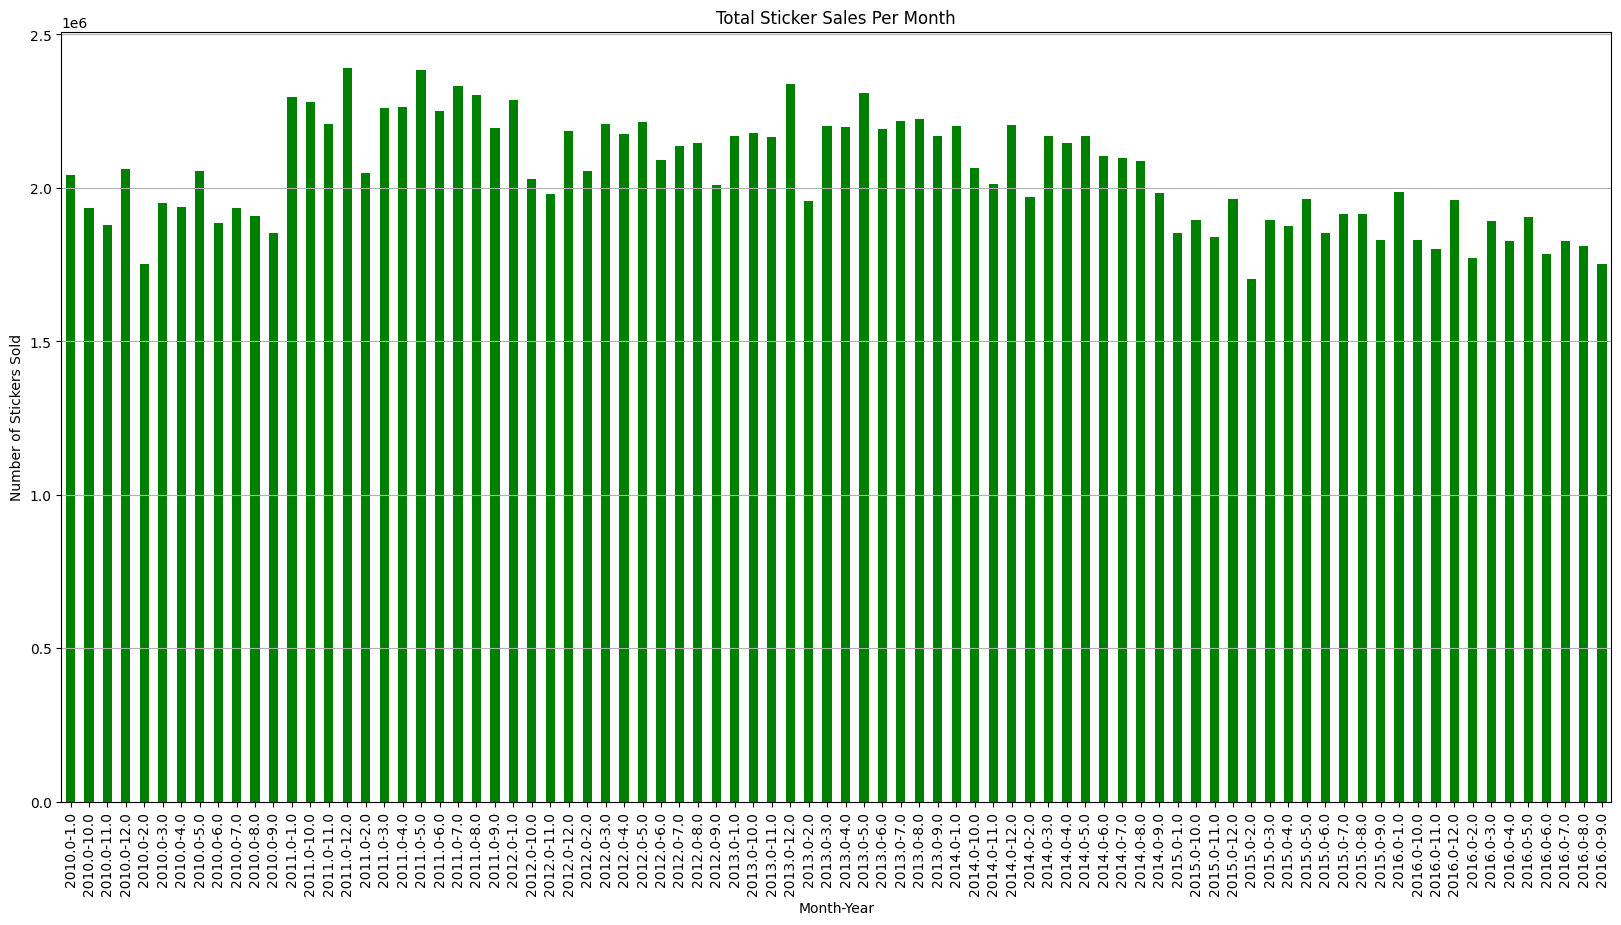

In [15]:
#bar plot for monthly sales
df['month_year'] = df['year'].astype(str) + '-' + df['month'].astype(str)  # Create a 'month-year' column
monthly_sales = df.groupby('month_year')['num_sold'].sum()

plt.figure(figsize=(20, 10))
monthly_sales.plot(kind='bar', color='green')
plt.title('Total Sticker Sales Per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Stickers Sold')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

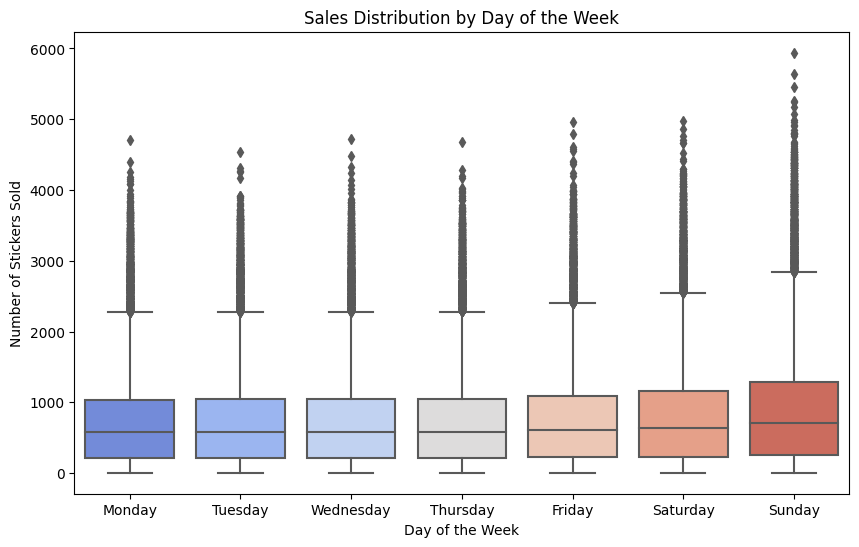

In [16]:
#sales distribution by day of the week
df['day_of_week'] = pd.to_datetime(df[['year', 'month', 'day']]).dt.day_name()

plt.figure(figsize=(10, 6))
sns.boxplot(x='day_of_week', y='num_sold', data=df, palette='coolwarm', order=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Sales Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Stickers Sold')
plt.show()

# Modelling

In [17]:
#features and target
x = df[['country', 'store', 'product', 'month', 'year', 'day']]
y = df['num_sold']

x = pd.get_dummies(x, drop_first=True)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#initializing models
models = {"Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(objective='reg:squarederror', random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)}

In [18]:
#training and evaluating each model
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    results.append({"Model": name, "R² Score": r2, "MAPE": mape})

results_df = pd.DataFrame(results).sort_values(by="MAPE")
print(results_df)

               Model  R² Score      MAPE
1      Random Forest  0.956277  0.427084
2            XGBoost  0.962076  0.674566
3  Gradient Boosting  0.891314  1.043950
0  Linear Regression  0.693372  3.248949


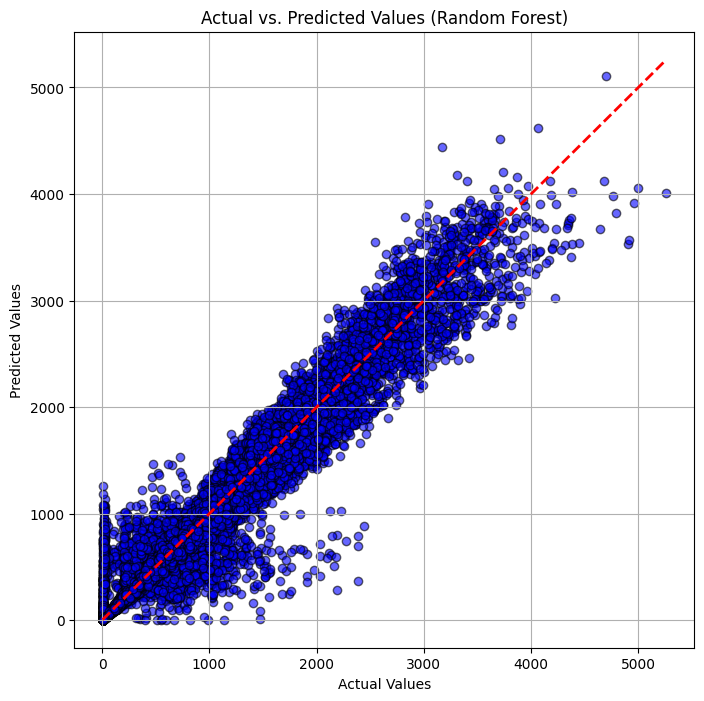

In [19]:
#predicting again using random forest, which has the best MAPE, for visualization
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(x_train, y_train)
y_pred_rf = random_forest_model.predict(x_test)

#actual vs. predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='blue', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.title('Actual vs. Predicted Values (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

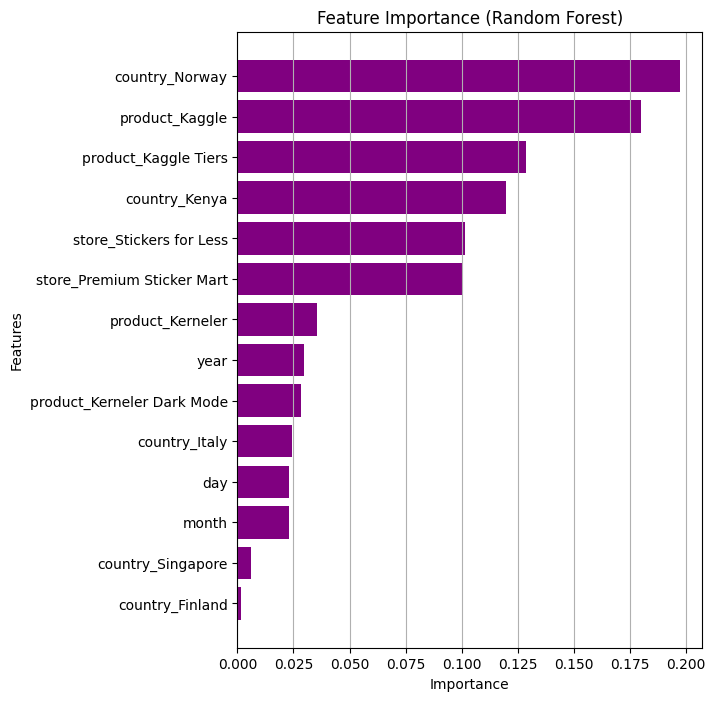

In [20]:
#feature importance
importance = random_forest_model.feature_importances_
features = x.columns

indices = np.argsort(importance)
sorted_features = [features[i] for i in indices]
plt.figure(figsize=(6, 8))
plt.barh(sorted_features, importance[indices], color='purple')  # Horizontal bars
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.grid(axis='x')
plt.show()

# **Conclusion**

- In this project, the objective was to predict sticker sales using a dataset consisting of various features like product type, store, country, and date-related variables. The primary evaluation metric for this competition was **Mean Absolute Percentage Error (MAPE)**, with **R² Score** also considered to assess the models' explanatory power.

- **Model Performance**: Random Forest's superior performance indicates its effectiveness in capturing complex, non-linear relationships in the data.

- **Feature Importance**: The feature importance analysis revealed key drivers of sticker sales, providing actionable insights for decision-making.